In [12]:
#Part I:
import numpy as np
import pandas as pd
pd.set_option('max_columns',30)

orders = pd.read_csv('data/Orders.csv')
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [13]:
#Problem 1: Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

orders.Sales = orders.Sales.str.replace(',','')
orders.Profit = orders.Sales.str.replace(',','')
orders.Sales = orders.Sales.str.replace('$','')
orders.Profit = orders.Sales.str.replace('$','')

orders.Sales = pd.to_numeric(orders.Sales)
orders.Profit = pd.to_numeric(orders.Profit)
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,221.98,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,3709.40,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,5175.17,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,2892.51,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,2832.96,903.04,Critical


In [29]:
#Problem 2: - Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to 
#             inventory management. Your manager is making plans for next year's inventory.
#    - He wants you to answer the following questions:
#    1. Is there any seasonal trend of inventory in the company?
#    2. Is the seasonal trend the same for different categories?

orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [50]:
inventory_trend = orders.groupby('Order.Date')[['Quantity']].sum()

(array([ 734442.,  734624.,  734808.,  734989.,  735173.,  735354.,
         735538.,  735719.,  735903.]), <a list of 9 Text xticklabel objects>)

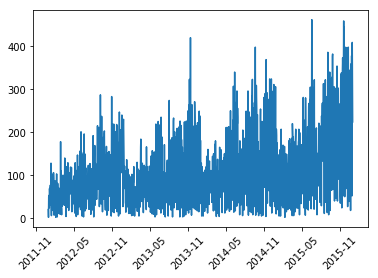

In [52]:
import matplotlib.pyplot as plt
plt.plot(inventory_trend)
plt.xticks(rotation=45)


In [75]:
orders['month'] = pd.DatetimeIndex(orders['Ship.Date']).month
orders['year']= pd.DatetimeIndex(orders['Ship.Date']).year

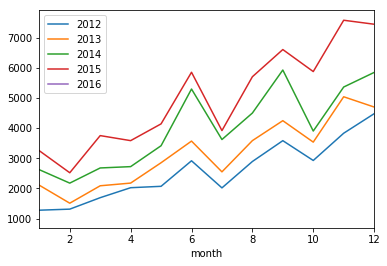

In [76]:
for index, group in orders.groupby(['year']):
   group_agg = group.groupby(['month'])['Quantity'].sum()
   group_agg.plot(y='Quantity', label=index, legend=True)
    
#Seasonal trends by year:

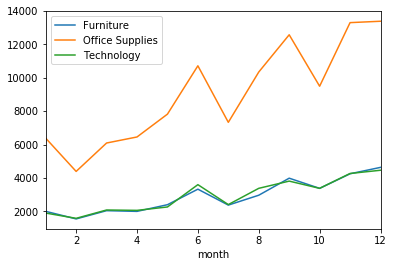

In [80]:
for index, group in orders.groupby(['Category']):
   group_agg = group.groupby(['month'])['Quantity'].sum()
   group_agg.plot(y='Quantity', label=index, legend=True)
    
#Only Office Supplies show a significant seasonal trend

In [81]:
# Problem 3: Why did customers make returns?
# Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

#1. How much profit did we lose due to returns each year?
#2. How many customer returned more than once? more than 5 times?
#3. Which regions are more likely to return orders?
#4. Which categories (sub-categories) of products are more likely to be returned?

returns = pd.read_csv('data/Returns.csv')

In [138]:
#3.1:
returns = returns.rename(columns={'Order ID': 'Order.ID'})
report = pd.merge(orders,returns, on=["Order.ID","Region"], how="outer")
report.loc[report['Returned'] == 'Yes'].groupby('year')[['Profit']].sum()

,Profit
year,
2012.0,109305.49
2013.0,97563.04
2014.0,126120.42
2015.0,187360.16
2016.0,2151.81


In [141]:
#3.2:
cust_returns = report.loc[report['Returned'] == 'Yes'].groupby('Customer.Name')[['Returned']].count()
cust_returns[cust_returns.Returned >= 5].count()  #176

Returned    174
dtype: int64

In [164]:
#3.3:
region_returns = report.loc[report['Returned'] == 'Yes'].groupby('Region')[['Returned']].count().reset_index()
region_returns.sort_values("Returned",ascending=False).head()   #Central America, Western Europe, Western US

,Region,Returned
2,Central America,248
22,Western Europe,233
23,Western US,177
12,Oceania,154
14,Southeastern Asia,140


In [170]:
#3.4:
cat_returns = report.loc[report['Returned'] == 'Yes'].groupby('Category')[['Returned']].count().reset_index()
cat_returns.sort_values("Returned",ascending=False).head()  #Office Supplies

,Category,Returned
1,Office Supplies,1334
2,Technology,442
0,Furniture,426


In [171]:
subcat_returns = report.loc[report['Returned'] == 'Yes'].groupby('Sub.Category')[['Returned']].count().reset_index()
subcat_returns.sort_values("Returned",ascending=False).head()  #Binders

,Sub.Category,Returned
3,Binders,263
2,Art,216
14,Storage,208
12,Paper,150
5,Chairs,147
